# 執行順序：new data -> outer with encoding -> x_test -> Decision tree

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/HTML final project/all_impute_data.csv').drop(columns=['ID','Count'])
Train_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Train_IDs.csv')
Test_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Test_IDs.csv')

In [4]:
data_ = pd.read_csv('/content/drive/MyDrive/HTML final project/new_data.csv')

In [5]:
data = data.drop(columns=['Quarter'])

# drop useless columns do not get better performance

In [6]:
training_data = pd.merge(data, Train_IDs, on=["Customer ID"])
x_train = training_data.iloc[:, 2:-1]
print(training_data['Satisfaction Score'].value_counts())
print('\nnan count: ', training_data['Satisfaction Score'].isna().sum())
x_train = x_train.fillna(x_train.median())
#x_train = x_train.to_numpy()

y_train = training_data['Churn Category'].to_numpy()

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

y_train = y_train.astype('int')
# training_data['Satisfaction Score']

3.0    1229
4.0     843
5.0     520
1.0     405
2.0     232
Name: Satisfaction Score, dtype: int64

nan count:  997
x_train.shape:  (4226, 42)
y_train.shape:  (4226,)


In [7]:
x_test = pd.read_csv('/content/drive/MyDrive/HTML final project/all_impute_test.csv').drop(columns=['Count','Quarter','ID'])
x_test = x_test.fillna(x_test.median())
x_test = x_test.iloc[:, 2:]
x_test = x_test.to_numpy()

print("x_test.shape: ", x_test.shape)

x_test.shape:  (1409, 42)


In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

SVCCC = SVC()
# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectFromModel(estimator=LogisticRegression())
	# fs = SelectKBest(score_func=SVCCC, k=5)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
print(fs.get_support())

# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()
cols = fs.get_support(indices=True)
print(data.columns[cols+2])
status = ['No Churn', 'Competitor', 'Dissatisfaction', 'Attitude', 'Price', 'Other']
for i in range(6):
  print()
  print(status[i])
  y_train_i = np.where(y_train == i, 1, -1)
  x_train_fs, x_test_fs, fs = select_features(x_train, y_train_i, x_test)
  # what are scores for the features
  # for i in range(len(fs.scores_)):
  # 	print('Feature %d: %f' % (i, fs.scores_[i]))
  # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  pyplot.show()
  cols = fs.get_support(indices=True)
  print(data.columns[cols+2])
# features_df_new = features_df.iloc[:,cols]

[False False False False False False False False False  True False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False  True
  True False False  True  True False]
Index(['City', 'Longitude', 'Tenure in Months', 'Monthly Charge',
       'Total Charges', 'Total Long Distance Charges', 'Total Revenue'],
      dtype='object')

No Churn


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

AttributeError: ignored

In [9]:
from sklearn.model_selection import train_test_split
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2)

# 各式各樣 classifier
* LGBM: 0.83
* XGB 0.82
* 貓貓 classifier 0.81
* GDB use x_train median: 0.82758
* GDB usw x_test median: 0.82988





In [33]:
# !pip install catboost
# from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
# CAT = CatBoostClassifier
MLP = MLPClassifier()
NB = GaussianNB()
QDA = QuadraticDiscriminantAnalysis()
SVCCC = SVC()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SGD = SGDClassifier()
ADA = AdaBoostClassifier()
DT = DecisionTreeClassifier()
RF = BaggingClassifier(DT)
XGB = XGBClassifier()
LGBM = LGBMClassifier()
GDB = GradientBoostingClassifier()
# from 文忠 
"""
from sklearn.preprocessing import StandardScaler

scaler.fit(x_val_train)
scaler = StandardScaler()
"""
VOTE = VotingClassifier(
estimators=[('xgb', XGB) ,('lgbm', LGBM), ('gdb', GDB)],
 voting='soft')

STACK =  clf = StackingClassifier(
    estimators=[('lgbm', LGBM), ('gdb', GDB)], final_estimator=LogisticRegression()
 )
features2 = ['Zip Code', 'Number of Referrals', 'Tenure in Months', 'Contract', 'Satisfaction Score']
features3 = ['Number of Referrals', 'Tenure in Months', 'Contract', 'Total Long Distance Charges', 'Satisfaction Score']
features1 = ['Dependents', 'Number of Referrals', 'Tenure in Months', 'Contract', 'Satisfaction Score']
x_val_train2 = x_val_train[features1]
x_val_test2 = x_val_test[features1]
# ================
# clf_lst = [MLP, NB, QDA, SVCCC, LR, KNN, SGD, ADA, DT, RF, XGB, LGBM, GDB]# ,VOTE]
clf_lst = [SVCCC, KNN]
# clf_lst = [ADA, DT, XGB, LGBM, GDB]
val_acc_lst = []
scaler = StandardScaler()
scaler.fit(x_val_train2)
scaler.transform(x_val_train2)
for clf in clf_lst:
  val_clf = clf.fit(x_val_train2, y_val_train)
  # print(f'{clf}: ', clf.feature_importances_)
  val_y_predicted = val_clf.predict(x_val_test2)
  val_acc = metrics.f1_score(y_val_test, val_y_predicted , average="macro")
  # val_acc = metrics.accuracy_score(y_val_test, val_y_predicted)
  val_acc_lst.append(val_acc)
  """
  print(f'{clf} false: ')
  print(y_val_test[(y_val_test != val_y_predicted)])
  print(f'{clf} true: ')
  print(y_val_test[(y_val_test == val_y_predicted)])
  """

print()
print("f1_score:")
for i in range(len(clf_lst)):
  print(clf_lst[i])
  print(val_acc_lst[i])

x_val_train2 = x_val_train[features2]
x_val_test2 = x_val_test[features2]
# ================
# clf_lst = [MLP, NB, QDA, SVCCC, LR, KNN, SGD, ADA, DT, RF, XGB, LGBM, GDB]# ,VOTE]
clf_lst = [SVCCC, KNN]
# clf_lst = [ADA, DT, XGB, LGBM, GDB]
val_acc_lst = []
scaler = StandardScaler()
scaler.fit(x_val_train2)
scaler.transform(x_val_train2)
for clf in clf_lst:
  val_clf = clf.fit(x_val_train2, y_val_train)
  # print(f'{clf}: ', clf.feature_importances_)
  val_y_predicted = val_clf.predict(x_val_test2)
  val_acc = metrics.f1_score(y_val_test, val_y_predicted , average="macro")
  # val_acc = metrics.accuracy_score(y_val_test, val_y_predicted)
  val_acc_lst.append(val_acc)
  """
  print(f'{clf} false: ')
  print(y_val_test[(y_val_test != val_y_predicted)])
  print(f'{clf} true: ')
  print(y_val_test[(y_val_test == val_y_predicted)])
  """

print()
print("f1_score:")
for i in range(len(clf_lst)):
  print(clf_lst[i])
  print(val_acc_lst[i])

x_val_train2 = x_val_train[features3]
x_val_test2 = x_val_test[features3]
# ================
# clf_lst = [MLP, NB, QDA, SVCCC, LR, KNN, SGD, ADA, DT, RF, XGB, LGBM, GDB]# ,VOTE]
clf_lst = [SVCCC, KNN]
# clf_lst = [ADA, DT, XGB, LGBM, GDB]
val_acc_lst = []
scaler = StandardScaler()
scaler.fit(x_val_train2)
scaler.transform(x_val_train2)
for clf in clf_lst:
  val_clf = clf.fit(x_val_train2, y_val_train)
  # print(f'{clf}: ', clf.feature_importances_)
  val_y_predicted = val_clf.predict(x_val_test2)
  val_acc = metrics.f1_score(y_val_test, val_y_predicted , average="macro")
  # val_acc = metrics.accuracy_score(y_val_test, val_y_predicted)
  val_acc_lst.append(val_acc)
  """
  print(f'{clf} false: ')
  print(y_val_test[(y_val_test != val_y_predicted)])
  print(f'{clf} true: ')
  print(y_val_test[(y_val_test == val_y_predicted)])
  """

print()
print("f1_score:")
for i in range(len(clf_lst)):
  print(clf_lst[i])
  print(val_acc_lst[i])


f1_score:
SVC()
0.21540129575730874
KNeighborsClassifier()
0.260143962875503

f1_score:
SVC()
0.14136600862264578
KNeighborsClassifier()
0.20267326211884518

f1_score:
SVC()
0.14136600862264578
KNeighborsClassifier()
0.19827655558031168


In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring ='f1_macro')

# Fit it to the data
tree_cv.fit(x_val_train, y_val_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2}
Best score is 0.28656467690174175


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3, None],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring ='f1_macro')

tree.fit(x_val_train, y_val_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree.best_params_))
print("Best score is {}".format(tree.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.29765855816293524


# KNN feature selection

In [ ]:
# permutation feature importance with knn for classification
# from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x_val_train, y_val_train)
# perform permutation importance
results = permutation_importance(model, x_val_train, y_val_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# accuracy

[0.1913743953482149, 0.34212735398088484, 0.31723231017713477]


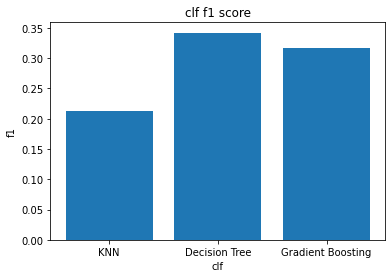

In [ ]:
import matplotlib.pyplot as plt
clf_lst = ['KNN', 'Decision Tree', 'Gradient Boosting']
# students = ['Jack', 'Mary', 'Mike', 'David']
# math_scores = [78, 67, 90, 81]
x = np.arange(len(clf_lst))
print(val_acc_lst)
val_acc_lst[0] = 0.2132
plt.bar(x, val_acc_lst)
plt.xticks(x, clf_lst)
plt.xlabel('clf')
plt.ylabel('f1')
plt.title('clf f1 score')
plt.show()

# f1 score

In [ ]:
import matplotlib.pyplot as plt
clf_lst = ['MLP', 'NB', 'QDA', 'SVC', 'LR', 'KNN', 'SGD', 'ADA', 'DT', 'RF', 'XGB', 'LGBM', 'GDB']
# students = ['Jack', 'Mary', 'Mike', 'David']
# math_scores = [78, 67, 90, 81]
x = np.arange(len(clf_lst))
plt.bar(x, val_acc_lst)
plt.xticks(x, clf_lst)
plt.xlabel('clf')
plt.ylabel('f1')
plt.title('clf f1 score')
plt.show()

In [ ]:
# change here to predict testing data by best classifier
test_clf = GDB.fit(x_train, y_train)
test_y_predicted = test_clf.predict(x_test)

In [ ]:
Test_IDs["Churn Category"] = test_y_predicted
Test_IDs.to_csv('GDB.csv', index=False)

In [ ]:
0.84827

In [ ]:
!pip install fancyimpute


文忠的嘗試施工區

In [ ]:
val F1-score       leader board
0.37655382459515047 =>    0.36220

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
best_f1 = -1
best_lr = 0

for lr in range(5 , 100 , 5):
  print(lr/100)
 
  clf = GradientBoostingClassifier(learning_rate=lr/100)
  val_f1 = sum(cross_val_score(clf, x_train,y_train, cv=10, scoring='f1_macro'))
  print(val_f1)
  if best_f1 < val_f1:
    best_f1 = val_f1
    best_lr = lr/100

In [ ]:
print(best_lr , best_f1) 

In [ ]:
best_f1_2 = -1
best_n = 0

for n in range(230 , 350 , 10):
  print(n)
  clf = GradientBoostingClassifier(learning_rate=best_lr , n_estimators=n ,  )
  val_f2 = sum(cross_val_score(clf, x_train,y_train, cv=10, scoring='f1_macro'))
  print(val_f2)
  if best_f1_2 < val_f2:
    best_f1_2 = val_f2
    best_n = n

In [ ]:
best_f1_3 = -1
best_d = 0

for d in range(3 , 10 ):
  print(d)
  clf = GradientBoostingClassifier(learning_rate=0.25 , n_estimators=230 , max_depth=d)
  val_f3 = sum(cross_val_score(clf, x_train,y_train, cv=10, scoring='f1_macro'))
  print(val_f3)
  if best_f1_3 < val_f3:
    best_f1_3 = val_f3
    best_n = n

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
scaler = StandardScaler()
new_x_train= scaler.fit(x_train).transform(x_train)
new_x_test = scaler.transform(x_test)
imputer = SoftImpute()
#imputer = KNNIterativeImputer()
new_x_train= imputer.fit_transform(x_train)
new_x_test = imputer.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
best_f1_3 = -1
best_d = 0


SGD = SGDClassifier()
ADA = AdaBoostClassifier()
DT = DecisionTreeClassifier()
RF = BaggingClassifier(DT)
XGB = XGBClassifier()
LGBM = LGBMClassifier()
GDB = GradientBoostingClassifier()
GDB_cv = GradientBoostingClassifier(learning_rate=0.25 , n_estimators=240)
VOTE = VotingClassifier(
estimators=[('xgb', XGB) ,('lgbm', LGBM), ('gdb', GDB)],
 voting='soft')
# print(f'{clf}: ', clf.feature_importances_)
clf_lst = [XGB, LGBM, GDB ,GDB_cv ]

for clf in clf_lst:
  val_fl_total = 0
  
  val_fl_total += sum(cross_val_score(clf, new_x_train,y_train, cv=10, scoring='f1_macro'))
  print(val_fl_total)
  

In [ ]:
clf = GradientBoostingClassifier(learning_rate=0.25 , n_estimators=240)
clf = clf.fit(x_train, y_train)

test_y_predicted = clf.predict(x_test)
Test_IDs["Churn Category"] = test_y_predicted
Test_IDs.to_csv('GDB_cv_please_dont_lie_to_meQQ.csv', index=False)

In [ ]:
clf = GradientBoostingClassifier(learning_rate=best_lr , n_estimators=best_n , max_depth =3, loss='exponential')
val_clf = clf.fit(x_val_train, y_val_train)

In [ ]:
print(best_d , best_f1_3) 

In [ ]:
# Cross validation
c = ['friedman_mse' , 'squared_error',]
best_f1_4 = -1
best_c = ""

for i in range(2):
  print(c[i])
  clf = GradientBoostingClassifier(learning_rate=best_lr , n_estimators=best_n  , criterion=c[i])
  val_clf = clf.fit(x_val_train, y_val_train)
  # print(f'{clf}: ', clf.feature_importances_)
  val_y_predicted = val_clf.predict(x_val_test)
  val_f1 = metrics.f1_score(y_val_test, val_y_predicted , average="macro")
  if best_f1_4 < val_f1:
    best_f1_4 = val_f1
    best_c = c[i]

In [ ]:
print(best_f1_4 ,best_c)

In [ ]:
{'learning_rate': 0.005533202346042043,
 'max_depth': 5,
 'n_estimators': 496,
 'subsample': 0.85574506869838}

In [ ]:
clf = rnd_search_cv2.best_estimator_

In [ ]:
val_clf = VOTE.fit(x_val_train, y_val_train)
val_y_predicted = val_clf.predict(x_val_test)
val_acc = metrics.accuracy_score(y_val_test, val_y_predicted)
print(val_acc)

In [ ]:
training_data = pd.merge(data, Train_IDs, on=["Customer ID"])
x_train = training_data.iloc[:, 2:-1]

In [ ]:
VOTE.fit(x_val_train, y_val_train)
test_y_predicted = VOTE.predict(x_test)

In [ ]:
Test_IDs["Churn Category"] = test_y_predicted
Test_IDs.to_csv('ensemble.csv', index=False)

In [ ]:
for i in Test_IDs["Churn Category"]:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

eclf = VotingClassifier(
estimators=[('xgb', XGB), ('lgbm', LGBM), ('gdb', GDB)],
 voting='soft')
eclf = eclf.fit(x_train , y_train)

In [ ]:
clf = GradientBoostingClassifier(learning_rate=best_lr , n_estimators=best_n  , criterion=best_c)

In [ ]:

# print(f'{clf}: ', clf.feature_importances_)
val_y_predicted = val_clf.predict(x_val_test)
val_f1 = metrics.f1_score(y_val_test, val_y_predicted , average="macro")


In [ ]:
print(val_f1)

In [ ]:
x_train = training_data.iloc[:, 2:-1]
x_train = x_train.to_numpy()

y_train = training_data['Churn Category'].to_numpy()

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

y_train = y_train.astype('int')

In [ ]:
GDB

In [ ]:
clf = GradientBoostingClassifier(learning_rate=0.25 , n_estimators=240)
clf = clf.fit(x_train, y_train)

test_y_predicted = clf.predict(x_test)


  

Test_IDs["Churn Category"] = test_y_predicted
Test_IDs.to_csv('GDB_SoftImuter_with4226.csv', index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
best_f1 = -1
best_lr = 0

for lr in range(5 , 90 , 5):
  print(lr/100)
 
  clf = MLPClassifier(learning_rate="adaptive" , learning_rate_init=lr/100)
  val_f1 = sum(cross_val_score(clf, x_train,y_train, cv=10, scoring='f1_macro'))
  print(val_f1)
  if best_f1 < val_f1:
    best_f1 = val_f1
    best_lr = lr/100

In [ ]:
gr